In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [2]:
diamonds = pd.read_csv(r"..\dataset\diamonds.csv")

The x,y and z values in this dataset stand for length, width and depth in milimeters

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond_train, diamond_test = train_test_split(diamonds, test_size=0.3, stratify=diamonds['color'], random_state=42)
print(diamond_train.shape, diamond_test.shape)

(37758, 11) (16182, 11)


In [6]:
features= ['carat']
dt = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(diamond_train[features], diamond_train['price'])

DecisionTreeRegressor(max_depth=3)

In [8]:
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

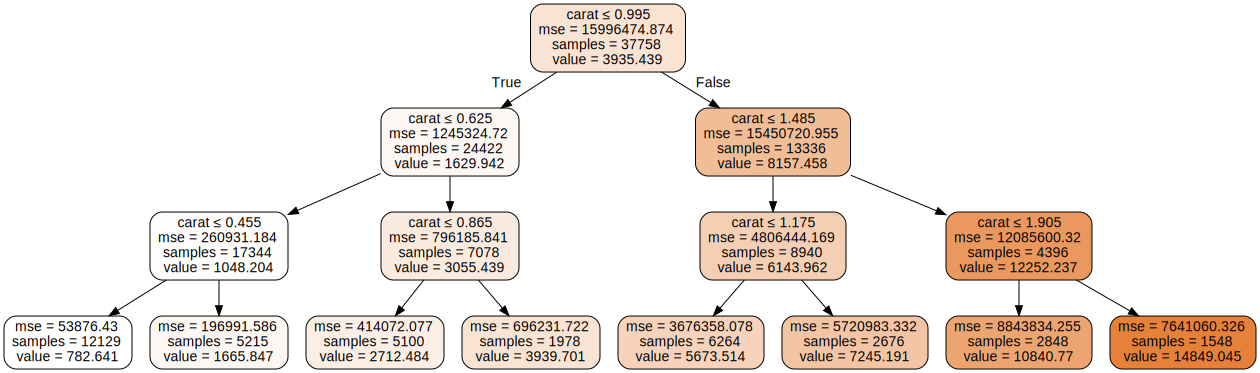

In [9]:
plot_tree_regression(dt, features)

Aangezien de prijs zeer groot kan zijn, zijn sommige MSE veel hoger dan andere. Mijn voorspelling is dat de RSME rond de 20% zal liggen.

In [10]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [12]:
diamonds["price"].mean()

3932.799721913237

In [11]:
predictionsOnTrainset = dt.predict(diamond_train[features])
predictionsOnTestset = dt.predict(diamond_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, diamond_train.price)
rmseTest = calculate_rmse(predictionsOnTestset, diamond_test.price)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 1460.348240077248
RMSE on test set 1440.4367517880214


De RMSE is 1440. Dit betekent dat de voorspellingen op de test groep ongeveer 1400 van het gemiddelde van alle price waardes liggen. De mean van de price is 3932. Dit betekent dat de RMSE ongeveer 36.6% verschil heeft, wat veel hoger is dan ik dacht. Dit betekent dat je vanuit de carat wel een beetje de price kan predicten, maar dat er veel meer invloeden zijn op de price.